In [330]:
from linmix import linmix
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, ks_2samp
import random

from data_file import flux_list_2_87mm_garrett, ricci_ophiuchi_flux_3_3mm
from Cumulative_spectral_indices import flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, ricci_taurus_fluxes_1mm, spectral_indices_taurus, flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, flux_lupus_1_mm, tazzari_lupus_spectral_indices, matching_fluxes_ricci_ophiucus_3MM_1mm, matching_fluxes_ricci_ophiucus_3mm_1MM, tazzari_lupus_flux

xsig = [0.2] * 99
ysig = [0.2] * 99

log_flux_barenfeld_0_88mm_updated = [np.log10(x) for x in flux_barenfeld_0_88mm_updated]
log_ricci_taurus_fluxes_1mm = [np.log10(x) for x in ricci_taurus_fluxes_1mm]
log_flux_list_ophiucus_ricci_1mm = [np.log10(x) for x in flux_list_ophiucus_ricci_1mm]
log_flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]

In [331]:
class region_data():
    def __init__(self, **kwargs):
        self.__dict__.update(kwargs)

lupus_data = region_data()
taurus_data = region_data()
ophiucus_data = region_data()
upper_sco_data = region_data()
total_sample_data = region_data()

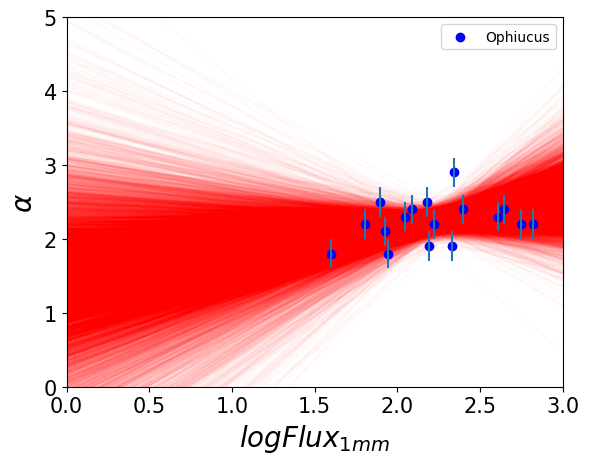

In [332]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, xsig[:len(flux_list_ophiucus_ricci_1mm)], ysig[:len(flux_list_ophiucus_ricci_1mm)], K=2)
lm.run_mcmc(silent=True)

ophiucus_slope_flux_alpha = []
ophiucus_y_intercept_flux_alpha = []
ophiucus_scatter = []

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    ophiucus_slope_flux_alpha.append(lm.chain[i]['beta'])
    ophiucus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ophiucus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='b', zorder=1)
plt.errorbar(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, yerr=ysig[:len(flux_list_ophiucus_ricci_1mm)], ls='none', zorder=1)


plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

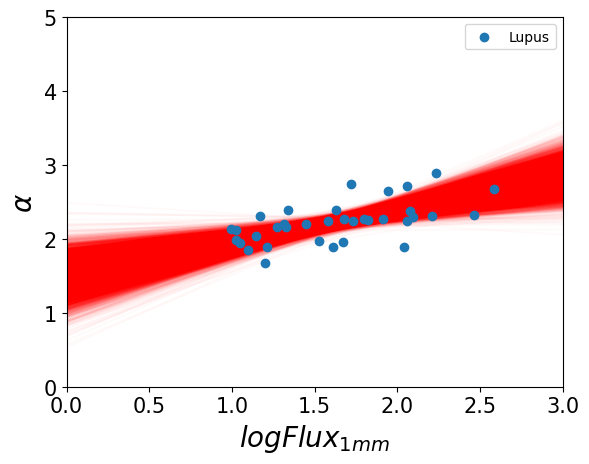

In [333]:
fig, ax = plt.subplots()

flux_lupus_1_mm = [np.log10(x) for x in flux_lupus_1_mm]
lm = linmix.LinMix(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, xsig[:len(flux_lupus_1_mm)], ysig[:len(flux_lupus_1_mm)], K=2)
lm.run_mcmc(silent=True)

lupus_slope_flux_alpha = []
lupus_y_intercept_flux_alpha = []
lupus_scatter = []

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    lupus_slope_flux_alpha.append(lm.chain[i]['beta'])
    lupus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    lupus_scatter.append(lm.chain[i]['sigsqr'])


plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)

ax.tick_params(which='both', labelsize=15)
plt.show()

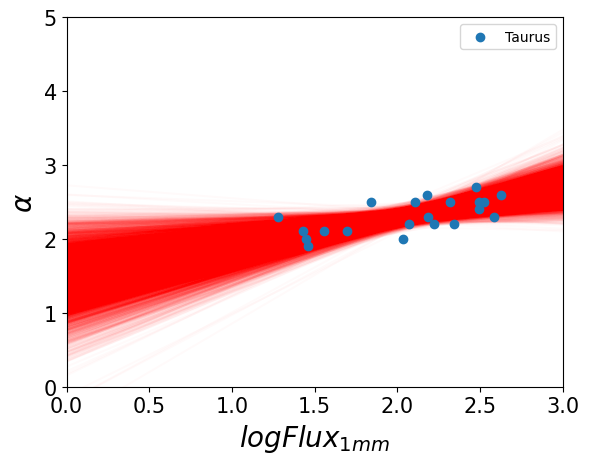

In [334]:
fig, ax = plt.subplots()

lm = linmix.LinMix(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, xsig[:len(ricci_taurus_fluxes_1mm)], ysig[:len(ricci_taurus_fluxes_1mm)], K=2)
lm.run_mcmc(silent=True)

taurus_slope_flux_alpha = []
taurus_y_intercept_flux_alpha = []
taurus_scatter =[]

xs = np.arange(xmin, xmax)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    taurus_slope_flux_alpha.append(lm.chain[i]['beta'])
    taurus_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    taurus_scatter.append(lm.chain[i]['sigsqr'])

plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', zorder=1)

plt.xlabel('$log Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.legend()
plt.xlim(0,3)
plt.ylim(0,5)
ax.tick_params(which='both', labelsize=15)
plt.show()

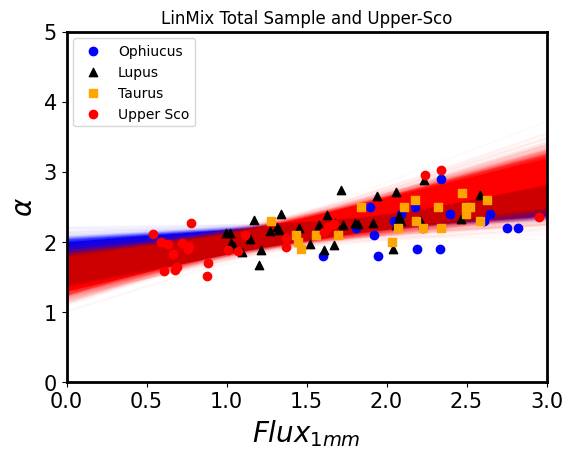

In [335]:
fig, ax = plt.subplots()

# set thickness axis
plt.setp(ax.spines.values(), linewidth=2)

# avoid axis labels being cut
plt.gcf().subplots_adjust(bottom=0.15, left=0.15)

log_total_fluxes = log_ricci_taurus_fluxes_1mm + log_flux_lupus_1_mm + log_flux_list_ophiucus_ricci_1mm
total_spectra_indices = spectral_indices_taurus + tazzari_lupus_spectral_indices + spectral_index_ophiucus

xsig = [0] * 100
ysig = [0] * 100
lm = linmix.LinMix(log_total_fluxes, total_spectra_indices, xsig[:len(log_total_fluxes)], ysig[:len(log_total_fluxes)], K=2)
lm.run_mcmc(silent=True)

total_sample_slope_flux_alpha = []
total_sample_y_intercept_flux_alpha = []
scatter_total_sample = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    total_sample_slope_flux_alpha.append(lm.chain[i]['beta'])
    total_sample_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='b', alpha=0.02, zorder=0)
    scatter_total_sample.append(lm.chain[i]['sigsqr'])


lm = linmix.LinMix(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, xsig[:len(flux_barenfeld_0_88mm_updated)], ysig[:len(flux_barenfeld_0_88mm_updated)], K=2)
lm.run_mcmc(silent=True)

upper_sco_slope_flux_alpha = []
upper_sco_y_intercept_flux_alpha = []
scatter_upper_sco = []

xs = np.arange(0, 7)
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    plt.plot(xs, ys, color='r', alpha=0.02, zorder=0)
    upper_sco_slope_flux_alpha.append(lm.chain[i]['beta'])
    upper_sco_y_intercept_flux_alpha.append(lm.chain[i]['alpha'])
    scatter_upper_sco.append(lm.chain[i]['sigsqr'])

plt.scatter(log_flux_list_ophiucus_ricci_1mm, spectral_index_ophiucus, label='Ophiucus', color='blue', zorder=1)
plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, label='Lupus', marker='^', color='black', zorder=1)
plt.scatter(log_ricci_taurus_fluxes_1mm, spectral_indices_taurus, label='Taurus', marker='s', color='orange', zorder=1)
plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, label='Upper Sco', color='red', zorder=1)

plt.xlabel('$Flux_{1mm}$', fontsize=20), plt.ylabel(r'$\alpha$', fontsize=20)
plt.xlim(0,3)
plt.ylim(0,5)
plt.legend()
ax.tick_params(which='both', labelsize=15)
plt.title("LinMix Total Sample and Upper-Sco")
plt.savefig("LinMix Total Sample and Upper-Sco")
plt.show()

# Histograms

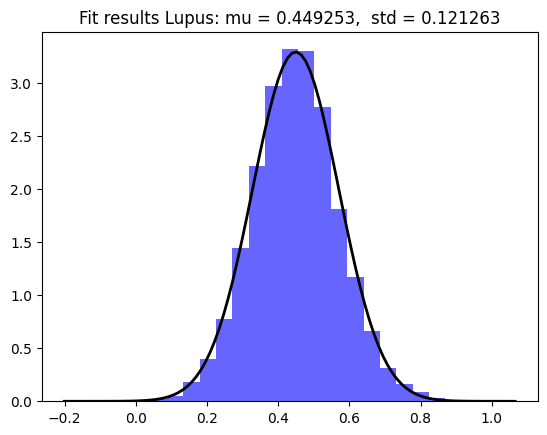

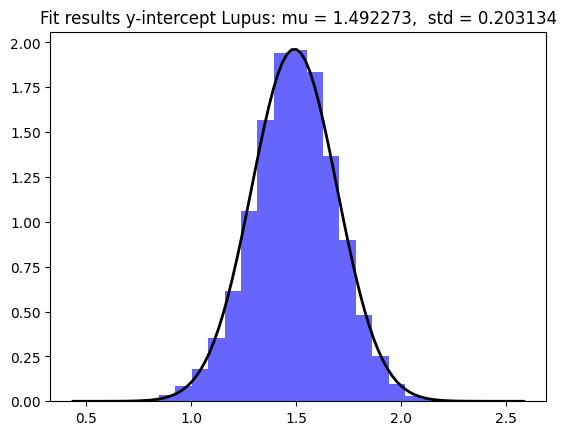

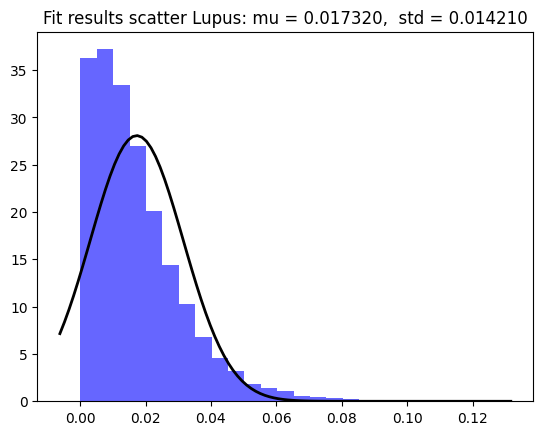

In [336]:
lupus_data.slope_mu, lupus_data.slope_std = norm.fit(lupus_slope_flux_alpha)
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results Lupus: mu = %.6f,  std = %.6f" % (lupus_data.slope_mu, lupus_data.slope_std)
plt.title(title)
plt.show()

lupus_data.y_intercept_mu, lupus_data.y_intercept_std = norm.fit(lupus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Lupus: mu = %.6f,  std = %.6f" % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.title(title)
plt.show()

lupus_scatter_mu, lupus_scatter_std = norm.fit(lupus_scatter)
# Plot the histogram.
plt.hist(lupus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_scatter_mu, lupus_scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Lupus: mu = %.6f,  std = %.6f" % (lupus_scatter_mu, lupus_scatter_std)
plt.title(title)
plt.show()

### Ophiucus

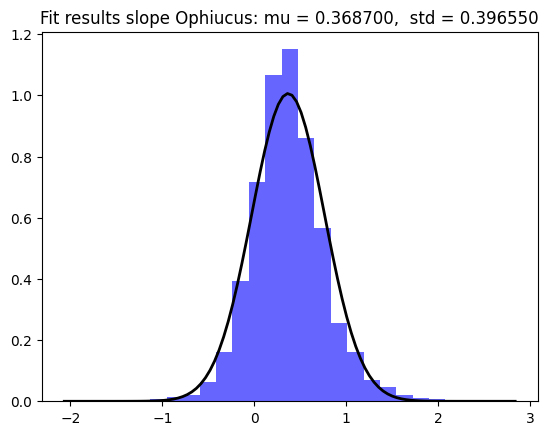

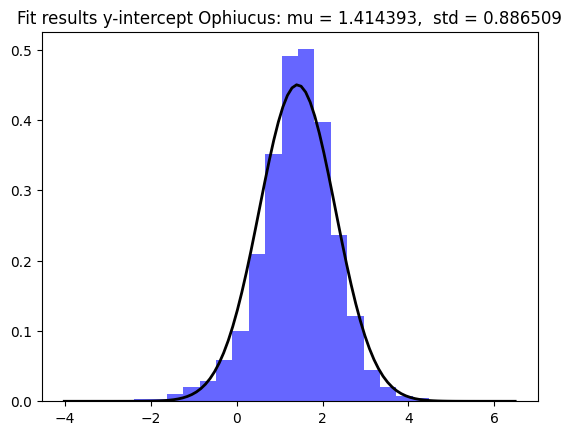

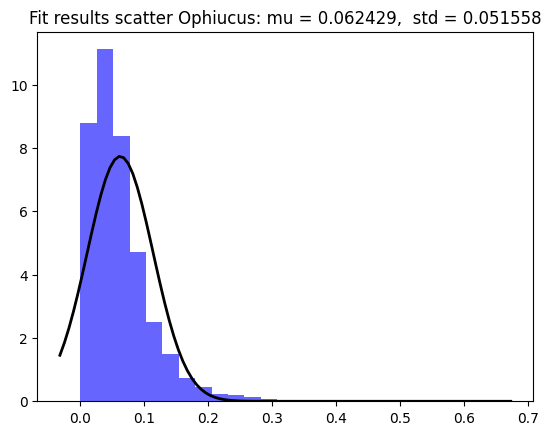

In [337]:
ophiucus_data.slope_mu, ophiucus_data.slope_std = norm.fit(ophiucus_slope_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.title(title)
plt.show()

ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std = norm.fit(ophiucus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.title(title)
plt.show()

ophiucus_data.scatter_mu, ophiucus_data.scatter_std = norm.fit(ophiucus_scatter)
_std = norm.fit(ophiucus_scatter)
# Plot the histogram.
plt.hist(ophiucus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Ophiucus: mu = %.6f,  std = %.6f" % (ophiucus_data.scatter_mu, ophiucus_data.scatter_std)
plt.title(title)
plt.show()

### Taurus

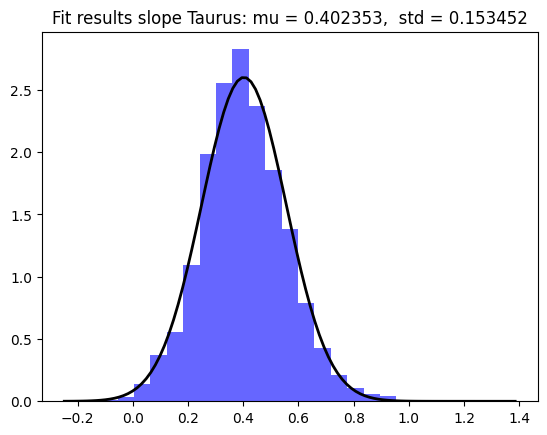

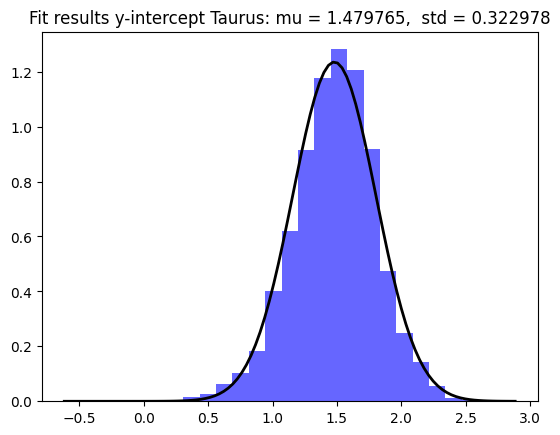

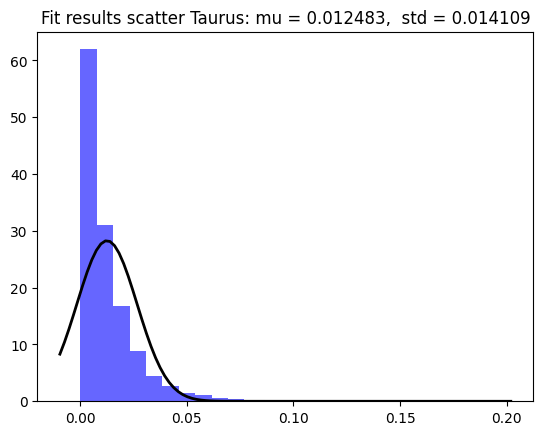

In [338]:
taurus_data.slope_mu, taurus_data.slope_std = norm.fit(taurus_slope_flux_alpha)
# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results slope Taurus: mu = %.6f,  std = %.6f" % (taurus_data.slope_mu, taurus_data.slope_std)
plt.title(title)
plt.show()

taurus_data.y_intercept_mu, taurus_data.y_intercept_std = norm.fit(taurus_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Taurus: mu = %.6f,  std = %.6f" % (taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.title(title)
plt.show()

taurus_data.scatter_mu, taurus_data.scatter_std = norm.fit(taurus_scatter)
# Plot the histogram.
plt.hist(taurus_scatter, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.scatter_mu, taurus_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Taurus: mu = %.6f,  std = %.6f" % (taurus_data.scatter_mu, taurus_data.scatter_std)
plt.title(title)
plt.show()

### Total Sample

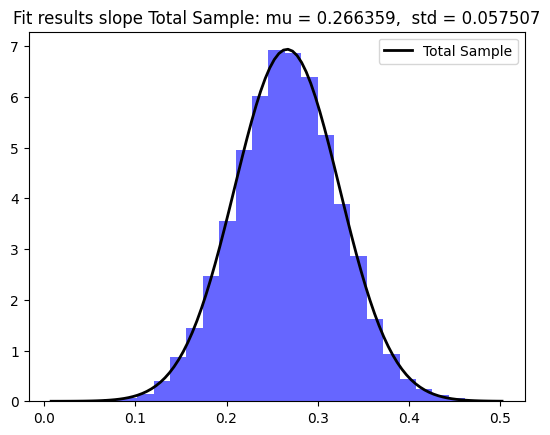

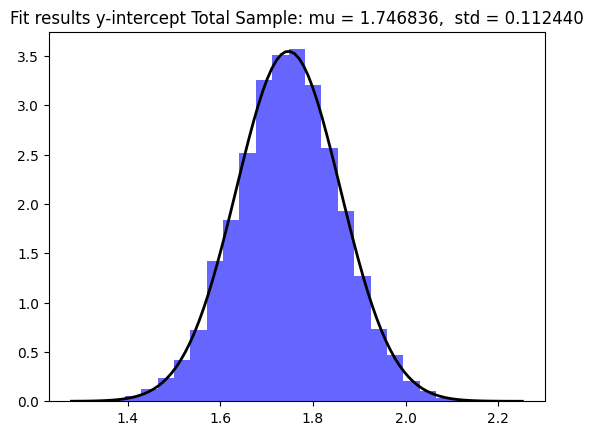

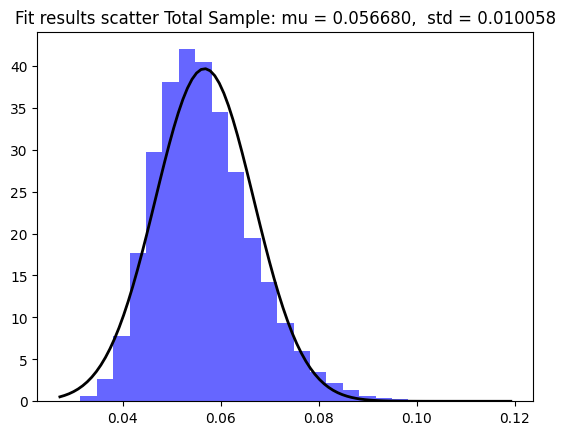

In [339]:
total_sample_data.slope_mu, total_sample_data.slope_std = norm.fit(total_sample_slope_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")
title = "Fit results slope Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.slope_mu, total_sample_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std = norm.fit(total_sample_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.title(title)
plt.show()

total_sample_data.scatter_mu, total_sample_data.scatter_std = norm.fit(scatter_total_sample)
# Plot the histogram.
plt.hist(scatter_total_sample, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Total Sample: mu = %.6f,  std = %.6f" % (total_sample_data.scatter_mu, total_sample_data.scatter_std)
plt.title(title)
plt.show()

### Upper-Sco

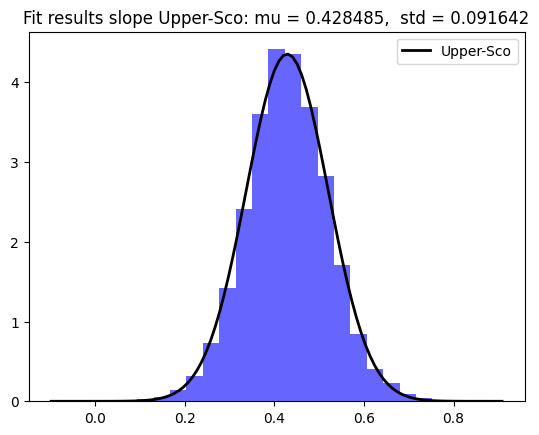

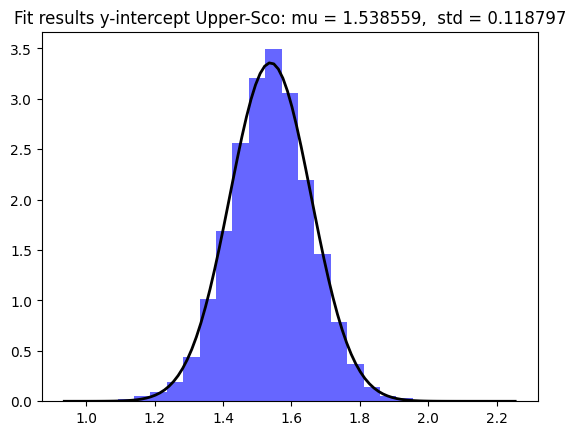

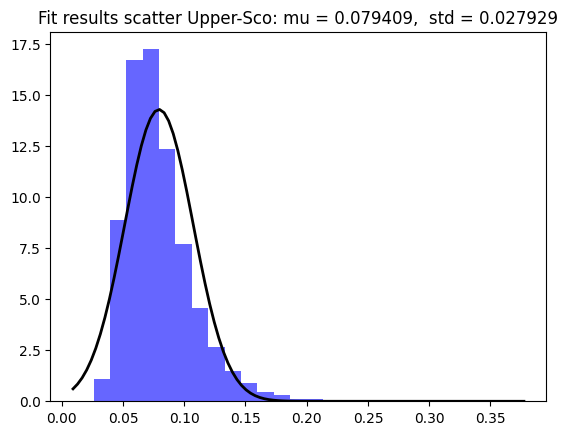

In [340]:
upper_sco_data.slope_mu, upper_sco_data.slope_std = norm.fit(upper_sco_slope_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco")
title = "Fit results slope Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.title(title)
plt.legend()
plt.show()

upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std = norm.fit(upper_sco_y_intercept_flux_alpha)
# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results y-intercept Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.title(title)
plt.show()

upper_sco_data.scatter_mu, upper_sco_data.scatter_std = norm.fit(scatter_upper_sco)
# Plot the histogram.
plt.hist(scatter_upper_sco, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results scatter Upper-Sco: mu = %.6f,  std = %.6f" % (upper_sco_data.scatter_mu, upper_sco_data.scatter_std)
plt.title(title)
plt.show()

In [341]:
print(u"Lupus slope mean: %.5f \u00B1 %.5f "
      "\nOphiucus slope mean: %.5f \u00B1 %.5f"
      "\nTaurus slope mean: %.5f \u00B1 %.5f"
      "\nTotal Sample slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco slope mean: %.5f \u00B1 %.5f"
      % (lupus_data.slope_mu, lupus_data.slope_std,
         ophiucus_data.slope_mu,ophiucus_data.slope_std,
         taurus_data.slope_mu, taurus_data.slope_std,
         total_sample_data.slope_mu, total_sample_data.slope_std,
         upper_sco_data.slope_mu, upper_sco_data.slope_std))

Lupus slope mean: 0.44925 ± 0.12126 
Ophiucus slope mean: 0.36870 ± 0.39655
Taurus slope mean: 0.40235 ± 0.15345
Total Sample slope mean: 0.26636 ± 0.05751
Upper-Sco slope mean: 0.42849 ± 0.09164


In [342]:
print(u"Lupus y-intercept mean: %.5f \u00B1 %.5f"
      "\nOphiucus y-intercept mean: %.5f \u00B1 %.5f"
      "\nTaurus y-intercept mean: %.5f\u00B1 %.5f"
      "\nTotal Sample y-intercept mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco y-intercept mean: %.5f \u00B1 %.5f"
      % (lupus_data.y_intercept_mu, lupus_data.y_intercept_std,
         ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std,
         taurus_data.y_intercept_mu, taurus_data.y_intercept_std,
         total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
         upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std))

Lupus y-intercept mean: 1.49227 ± 0.20313
Ophiucus y-intercept mean: 1.41439 ± 0.88651
Taurus y-intercept mean: 1.47977± 0.32298
Total Sample y-intercept mean: 1.74684 ± 0.11244
Upper-Sco y-intercept mean: 1.53856 ± 0.11880


In [343]:
print(u"Lupus scatter mean: %.5f \u00B1 %.5f "
      "\nOphiucus scatter mean: %.5f \u00B1 %.5f"
      "\nTaurus scatter mean: %.5f \u00B1 %.5f"
      "\nTotal scatter slope mean: %.5f \u00B1 %.5f"
      "\nUpper-Sco scatter mean: %.5f \u00B1 %.5f"
      % (lupus_scatter_mu, lupus_scatter_std,
         ophiucus_data.scatter_mu, ophiucus_data.scatter_std,
         taurus_data.scatter_mu, taurus_data.scatter_std,
         total_sample_data.scatter_mu, total_sample_data.scatter_std,
         upper_sco_data.scatter_mu, upper_sco_data.scatter_std))

Lupus scatter mean: 0.01732 ± 0.01421 
Ophiucus scatter mean: 0.06243 ± 0.05156
Taurus scatter mean: 0.01248 ± 0.01411
Total scatter slope mean: 0.05668 ± 0.01006
Upper-Sco scatter mean: 0.07941 ± 0.02793


In [344]:
from tabulate import tabulate
first_row = ["Region", "Slope mean", "Slope std", "Y-Intercept mean", "Y-Intercept std", "scatter mean", "scatter std"]
table = [["Upper-Sco", upper_sco_data.slope_mu, upper_sco_data.slope_std, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std, upper_sco_data.scatter_mu, upper_sco_data.scatter_std],
         ["Lupus", lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std],
         ["Taurus", taurus_data.slope_mu, taurus_data.slope_std, taurus_data.y_intercept_mu, taurus_data.y_intercept_std, taurus_data.scatter_mu, taurus_data.scatter_std],
         ["Ophiucus", ophiucus_data.slope_mu, ophiucus_data.slope_std, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std, ophiucus_data.scatter_mu, ophiucus_data.scatter_std],
         ["Lupus + Taurus + Ophiucus", total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std, total_sample_data.scatter_mu, total_sample_data.scatter_std]]
print(tabulate(table, headers = first_row))

Region                       Slope mean    Slope std    Y-Intercept mean    Y-Intercept std    scatter mean    scatter std
-------------------------  ------------  -----------  ------------------  -----------------  --------------  -------------
Upper-Sco                      0.428485    0.0916417             1.53856           0.118797       0.0794093      0.0279289
Lupus                          0.449253    0.121263              1.49227           0.203134       0.01732        0.0142096
Taurus                         0.402353    0.153452              1.47977           0.322978       0.012483       0.0141086
Ophiucus                       0.3687      0.39655               1.41439           0.886509       0.0624285      0.051558
Lupus + Taurus + Ophiucus      0.266359    0.0575074             1.74684           0.11244        0.0566796      0.0100577


/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/1930988756.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/1930988756.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/1930988756.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/

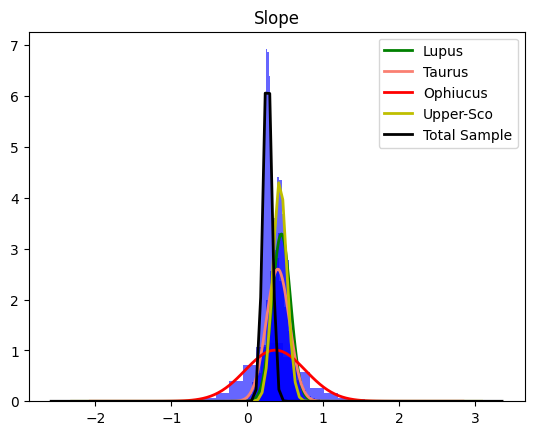

In [345]:
# Plot the histogram.
plt.hist(lupus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.slope_mu, lupus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, color="g", label="Lupus")


# Plot the histogram.
plt.hist(taurus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.slope_mu, taurus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.slope_mu, ophiucus_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Ophiucus", color="r")


# Plot the histogram.
plt.hist(upper_sco_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.slope_mu, upper_sco_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_slope_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.slope_mu, total_sample_data.slope_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")


plt.title("Slope")
plt.legend()

/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/2835114649.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/2835114649.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/2835114649.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, p, 'k', linewidth=2, color="r")
/var/folders/35/w3n1r1r17h7553z73jkyb2500000gn/T/ipykernel_78468/

Text(0.5, 1.0, 'Y-Intercept')

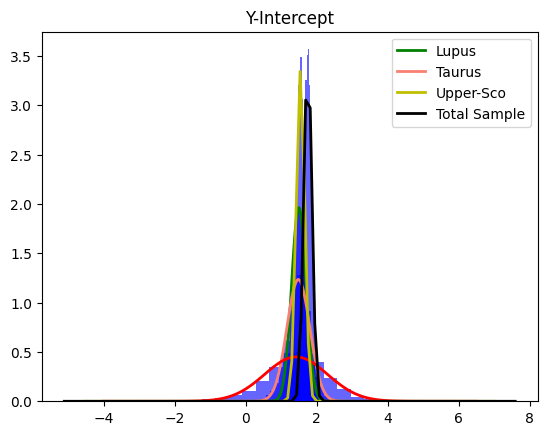

In [346]:
# Plot the histogram.
plt.hist(lupus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, lupus_data.y_intercept_mu, lupus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Lupus", color="g")


# Plot the histogram.
plt.hist(taurus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, taurus_data.y_intercept_mu, taurus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Taurus", color="salmon")


# Plot the histogram.
plt.hist(ophiucus_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, ophiucus_data.y_intercept_mu, ophiucus_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, color="r")


# Plot the histogram.
plt.hist(upper_sco_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Upper-Sco", color="y")


# Plot the histogram.
plt.hist(total_sample_y_intercept_flux_alpha, bins=25, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std)
plt.plot(x, p, 'k', linewidth=2, label="Total Sample")

plt.legend()
plt.title("Y-Intercept")

In [347]:
#ks test
# assume scatter = 0, calculate spectral_index for upper-sco from function of total sample
# repeat by changing alpha, beta and scatter
# using montecarlo simulation random values for alpha, beta and scatter will be taken
# note that while alpha and beta will be constant for each rune, scatter will not
# I have to randomly assign a spread for the scatter for every run
# for every element calculated in every run, scatter will have to change and be withing the standard deviation

# the run ks 2 sample test on observed vs calculated and store the values

## Take random values from Gaussian

In [348]:
calculated_spectra_indices_upper_sco = []
calculated_spectra_indices_lupus = []

def spectral_index_function(alpha, beta, scatter, x):
    return alpha + beta * x - scatter

beta_list = []
alpha_list = []
def loop_spectra_index(slope_mu, slope_std, y_intercept_mu, y_intercept_std, scatter_mu, scatter_std, flux):
    beta = random.gauss(slope_mu, slope_std)
    beta_list.append(beta)
    alpha = random.gauss(y_intercept_mu, y_intercept_std)
    alpha_list.append(alpha)
    subset = []
    for x in range(len(flux)):
        new_scatter_std = random.gauss(scatter_mu, scatter_std)
        scatter = random.gauss(scatter_mu, scatter_mu - new_scatter_std)
        subset.append(spectral_index_function(alpha, beta, scatter, flux[x]))

    return subset

for i in range(1000):
    calculated_spectra_indices_upper_sco.append(loop_spectra_index(upper_sco_data.slope_mu, upper_sco_data.slope_std,
                                                                   upper_sco_data.y_intercept_mu, upper_sco_data.y_intercept_std,
    upper_sco_data.scatter_mu, upper_sco_data.scatter_std,
    log_flux_barenfeld_0_88mm_updated))

    calculated_spectra_indices_lupus.append(loop_spectra_index(lupus_data.slope_mu, lupus_data.slope_std, lupus_data.y_intercept_mu, lupus_data.y_intercept_std, lupus_scatter_mu, lupus_scatter_std, log_flux_lupus_1_mm))

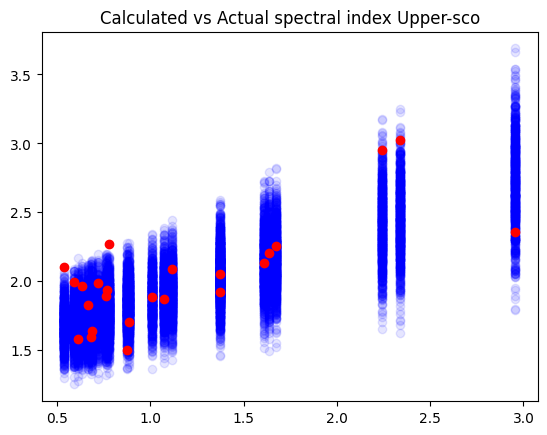

Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation:  0.2506650650367671


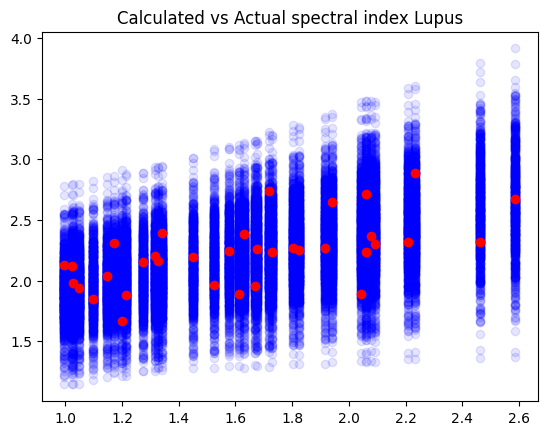

In [349]:
ks_2sample_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_upper_sco.append(ks_2samp(spectral_index_upper_sco, calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.title("Calculated vs Actual spectral index Upper-sco")
plt.show()
print("Mean ks test on calculated vs measure spectral index for upper-sco from upper-sco mc simulation: ", np.mean(ks_2sample_upper_sco))


for i in range(len(calculated_spectra_indices_lupus)):
    plt.scatter(log_flux_lupus_1_mm, calculated_spectra_indices_lupus[i], alpha=0.1, c="b")

plt.scatter(log_flux_lupus_1_mm, tazzari_lupus_spectral_indices, c='r')
plt.title("Calculated vs Actual spectral index Lupus")
plt.show()

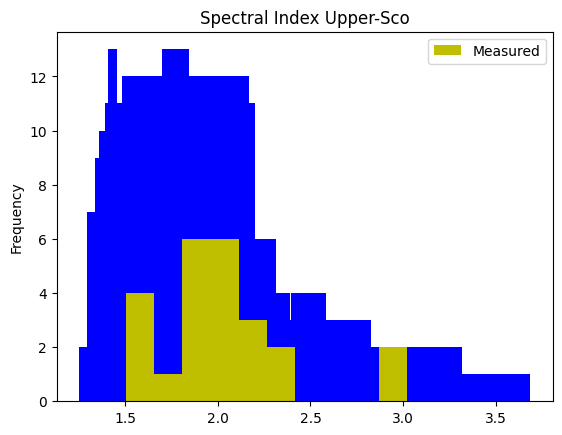

In [350]:
for i in range(len(calculated_spectra_indices_upper_sco)):
    mu_calculated, std_calculated = norm.fit(calculated_spectra_indices_upper_sco[i])

    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu_calculated, std_calculated)
    plt.hist(calculated_spectra_indices_upper_sco[i], color='b')

plt.hist(spectral_index_upper_sco, color='y', label='Measured')

plt.title("Spectral Index Upper-Sco")
plt.ylabel("Frequency")
plt.legend()
plt.show()

Text(0, 0.5, '$\\alpha$')

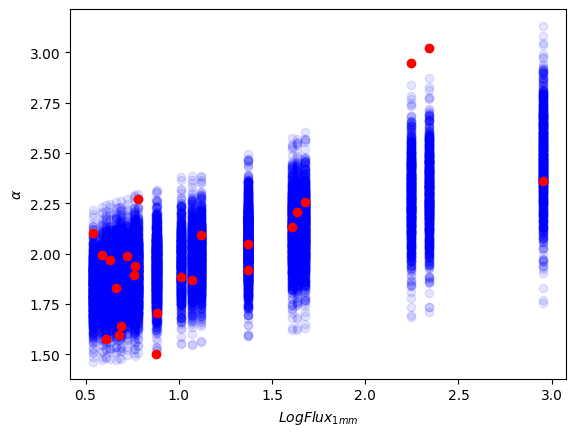

In [351]:
calculated_spectral_index_upper_sco_from_total_sample = []

for i in range(1000):
    calculated_spectral_index_upper_sco_from_total_sample.append(loop_spectra_index(total_sample_data.slope_mu, total_sample_data.slope_std, total_sample_data.y_intercept_mu, total_sample_data.y_intercept_std,
    total_sample_data.scatter_mu, total_sample_data.scatter_std, log_flux_barenfeld_0_88mm_updated))

for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b")

plt.scatter(log_flux_barenfeld_0_88mm_updated, spectral_index_upper_sco, c='r')
plt.xlabel("$Log Flux_{1mm}$")
plt.ylabel(r"$\alpha$")

#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for total sample

In [352]:
matching_upper_sco_real_vs_from_total_sample = []
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    matching_upper_sco_real_vs_from_total_sample.append(ks_2samp(calculated_spectral_index_upper_sco_from_total_sample[i], spectral_index_upper_sco)[1])

print("Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation: ", np.mean(matching_upper_sco_real_vs_from_total_sample))

Mean ks test on calculated vs measure spectral index for upper-sco from total sample mc simulation:  0.18994709325865564


#### Mean of ks_2sample between real upper-sco spectral indices and calculated upper-sco spectral index values from the Monte-Carlo simulation for upper-sco sample

In [353]:
print(np.mean(ks_2sample_upper_sco))

0.2506650650367671


In [354]:
print(np.mean(matching_upper_sco_real_vs_from_total_sample)/np.mean(ks_2sample_upper_sco))

0.7577725010495361


In [355]:
print(max(matching_upper_sco_real_vs_from_total_sample))

0.686017125117228


In [356]:
print(np.median(matching_upper_sco_real_vs_from_total_sample))
print(np.median(ks_2sample_upper_sco))

0.06780335175136987
0.13982257948893737


In [357]:
print(matching_upper_sco_real_vs_from_total_sample, '\n ________________________')

[0.00010401434205661125, 0.06780335175136987, 0.011965431606262756, 0.029913567122680163, 0.00010401434205661125, 0.686017125117228, 0.4490368220409109, 0.06780335175136987, 0.011965431606262756, 0.4490368220409109, 0.13982257948893737, 0.029913567122680163, 0.029913567122680163, 0.0004056559340207839, 0.029913567122680163, 0.011965431606262756, 0.0014013568629808897, 0.029913567122680163, 0.4490368220409109, 0.26283384201555077, 0.26283384201555077, 0.0014013568629808897, 0.06780335175136987, 0.26283384201555077, 0.4490368220409109, 0.029913567122680163, 0.0004056559340207839, 0.4490368220409109, 0.00432085032746239, 0.4490368220409109, 0.011965431606262756, 0.06780335175136987, 0.029913567122680163, 0.26283384201555077, 0.029913567122680163, 0.00432085032746239, 0.011965431606262756, 0.011965431606262756, 0.029913567122680163, 0.011965431606262756, 0.029913567122680163, 0.0014013568629808897, 0.26283384201555077, 0.029913567122680163, 0.0004056559340207839, 0.4490368220409109, 0.0678

In [358]:
print(calculated_spectral_index_upper_sco_from_total_sample[0], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[2], '\n',
      calculated_spectral_index_upper_sco_from_total_sample[4], '\n',
      spectral_index_upper_sco)

[1.6716767090252898, 1.6793033742224963, 1.960253155249594, 1.6541785452200797, 1.6298743714843704, 1.641116368251002, 1.7135491850389903, 1.6591443013651297, 1.9765776949183949, 1.7042599902592623, 1.6443797770232087, 1.7462305441905404, 1.7905837850903532, 1.8503338049581317, 1.8619969206880225, 1.6072773041320094, 2.1030944737742883, 1.6821714708824427, 1.6942547697263926, 1.6783554839591546, 1.8401892349056288, 1.7366187611208885, 1.7836655556135161, 1.6555133507868685] 
 [2.019310092302467, 2.013458956328431, 2.544044770753493, 1.963227163299656, 1.9480795658172707, 2.0097919470476735, 2.1308088794094493, 1.9527230734878747, 2.5782207526313545, 2.113192734755964, 1.9747033242309187, 2.128134188984712, 2.2376401777888932, 2.3510785361391884, 2.3429591665493112, 2.01058247927375, 2.78566874100186, 2.0345246457296002, 2.085650004032074, 1.998847905891695, 2.3338926485291025, 2.1339213423739953, 2.2436349872635573, 2.007221943621869] 
 [2.163738318482977, 2.1637492540288097, 2.6817166

In [359]:
print(alpha_list, '\n __________________________________ \n', beta_list)

[1.5937242605985835, 1.4023555716276797, 1.5796093714911903, 1.6579506390426477, 1.4494216058470828, 1.6999808648499393, 1.7297606003137695, 1.625503095484355, 1.6436309935792228, 1.0315586507255712, 1.4996972479150805, 1.3774355430172818, 1.5342146064454574, 1.4676656711316518, 1.5629971841313233, 1.3075632530263612, 1.46088111419212, 1.6980434064283967, 1.3208748285375427, 1.8206866559020691, 1.3668352973016267, 1.678138976155209, 1.6047646761836722, 1.5365838640329677, 1.5355204207537898, 1.6532904497550656, 1.624681247029202, 1.466655730548284, 1.57711801230031, 0.9633783872732513, 1.4520414826412307, 1.332957153526975, 1.6593064916819908, 1.3600895349219995, 1.4967667122045956, 1.613913861100735, 1.473057401227645, 1.1738040661408098, 1.4394962887301825, 1.5300932310600708, 1.3415503472062857, 1.6336244543501746, 1.6267973899835688, 1.5809828117788436, 1.4449812720502737, 1.538596721531531, 1.652479566013162, 1.4378717345734013, 1.497294802540211, 1.5476609193942612, 1.35419112677

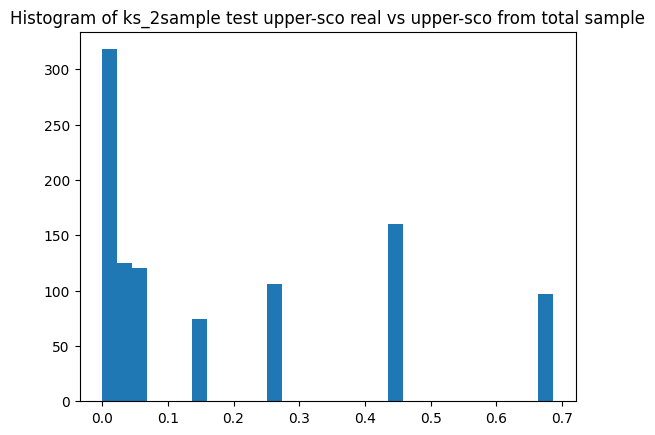

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.23364079, -0.13364079, -0.03364079,  0.06635921,  0.16635921,
         0.26635921,  0.36635921,  0.46635921,  0.56635921,  0.66635921,
         0.76635921]),
 <BarContainer object of 10 artists>)

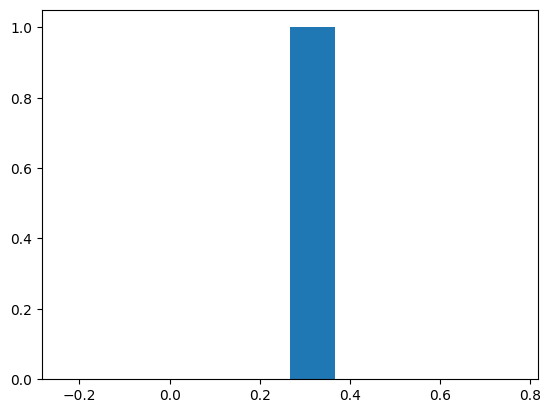

In [360]:
plt.hist(matching_upper_sco_real_vs_from_total_sample, bins=30)
plt.title('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.savefig('Histogram of ks_2sample test upper-sco real vs upper-sco from total sample')
plt.show()
plt.hist(total_sample_data.slope_mu)

In [ ]:
less_than_2_5_spectral_index_upper_sco = []
less_than_2_5_flux_upper_sco = []
for i in spectral_index_upper_sco:
    if i <= 2.5:
        less_than_2_5_spectral_index_upper_sco.append(i)
        less_than_2_5_flux_upper_sco.append(log_flux_barenfeld_0_88mm_updated[spectral_index_upper_sco.index(i)])

plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, c='r', zorder=1)
for i in range(len(calculated_spectral_index_upper_sco_from_total_sample)):
    plt.scatter(log_flux_barenfeld_0_88mm_updated, calculated_spectral_index_upper_sco_from_total_sample[i], alpha=0.1, c="b", zorder=0)


In [ ]:
less_than_2_5_index_upper_sco = region_data()

In [ ]:
lm = linmix.LinMix(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, xsig[:len(less_than_2_5_flux_upper_sco)], ysig[:len(less_than_2_5_flux_upper_sco)], K=2)
lm.run_mcmc(silent=True)

less_than_2_5_index_upper_sco = region_data()

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_5_index_upper_sco.slope = []
less_than_2_5_index_upper_sco.y_intercept = []
less_than_2_5_index_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_5_index_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_5_index_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_5_index_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [ ]:
less_than_2_5_index_calculated_spectra_indices_upper_sco = []
less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std = norm.fit(less_than_2_5_index_upper_sco.slope)
less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std = norm.fit(less_than_2_5_index_upper_sco.y_intercept)
less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std = norm.fit(less_than_2_5_index_upper_sco.scatter)

In [ ]:
for i in range(1000):
    less_than_2_5_index_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_5_index_upper_sco.slope_mu, less_than_2_5_index_upper_sco.slope_std,
                                                                   less_than_2_5_index_upper_sco.y_intercept_mu, less_than_2_5_index_upper_sco.y_intercept_std,
    less_than_2_5_index_upper_sco.scatter_mu, less_than_2_5_index_upper_sco.scatter_std,
    less_than_2_5_flux_upper_sco))

In [ ]:
ks_2sample_less_than_2_5_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_5_upper_sco.append(ks_2samp(less_than_2_5_spectral_index_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_index_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(less_than_2_5_flux_upper_sco, less_than_2_5_spectral_index_upper_sco, color='r')


In [ ]:
np.mean(ks_2sample_less_than_2_5_upper_sco)

In [ ]:
less_than_2_flux_upper_sco = region_data()
less_than_2_flux_upper_sco.index = []
less_than_2_flux_upper_sco.flux = []

for i in log_flux_barenfeld_0_88mm_updated:
    if i < 2.0:
        less_than_2_flux_upper_sco.flux.append(i)
        less_than_2_flux_upper_sco.index.append(spectral_index_upper_sco[log_flux_barenfeld_0_88mm_updated.index(i)])

plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index)


In [ ]:
lm = linmix.LinMix(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, xsig[:len(less_than_2_flux_upper_sco.flux)], ysig[:len(less_than_2_flux_upper_sco.flux)], K=2)
lm.run_mcmc(silent=True)

xmin = 0
xmax = 800
xs = np.arange(xmin,xmax)
less_than_2_flux_upper_sco.slope = []
less_than_2_flux_upper_sco.y_intercept = []
less_than_2_flux_upper_sco.scatter = []
for i in range(0, 10000):
    ys = lm.chain[i]['alpha'] + xs * lm.chain[i]['beta']
    less_than_2_flux_upper_sco.slope.append(lm.chain[i]['beta'])
    less_than_2_flux_upper_sco.y_intercept.append(lm.chain[i]['alpha'])
    less_than_2_flux_upper_sco.scatter.append(lm.chain[i]['sigsqr'])

In [ ]:
less_than_2_flux_calculated_spectra_indices_upper_sco = []
less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std = norm.fit(less_than_2_flux_upper_sco.slope)
less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std = norm.fit(less_than_2_flux_upper_sco.y_intercept)
less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std = norm.fit(less_than_2_flux_upper_sco.scatter)

In [ ]:
for i in range(1000):
    less_than_2_flux_calculated_spectra_indices_upper_sco.append(loop_spectra_index(less_than_2_flux_upper_sco.slope_mu, less_than_2_flux_upper_sco.slope_std,
                                                                   less_than_2_flux_upper_sco.y_intercept_mu, less_than_2_flux_upper_sco.y_intercept_std,
    less_than_2_flux_upper_sco.scatter_mu, less_than_2_flux_upper_sco.scatter_std,
    less_than_2_flux_upper_sco.flux))

In [ ]:
ks_2sample_less_than_2_flux_upper_sco = []
for i in range(len(calculated_spectra_indices_upper_sco)):
    ks_2sample_less_than_2_flux_upper_sco.append(ks_2samp(less_than_2_flux_upper_sco.index, less_than_2_flux_calculated_spectra_indices_upper_sco[i])[1])
    plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_calculated_spectra_indices_upper_sco[i], alpha=0.1, c="b")

plt.scatter(less_than_2_flux_upper_sco.flux, less_than_2_flux_upper_sco.index, color='r')


In [ ]:
print(np.mean(ks_2sample_less_than_2_flux_upper_sco))